# Aula 4.1: Estimação básica de propagação de erros experimentais

## Objetivos

Vamos ver os básicos de propagação de erros

- Erros em medições: descrição, tipos
- Propagação: distribuções de probabilidade e aproximacao linear
- Regras práticas e exemplos.

Algumas Refs:

http://www.webassign.net/question_assets/unccolphysmechl1/measurements/manual.pdf

http://www.dartmouth.edu/~pchem/75/pdfs/ErrAnalysis.pdf

## Incertezas em mediçoes

Toda medição vem com um erro. (O conceito de erro é intrínseco ao de mediçao!)

$$ \text{valor medido} = \text{valor medio} \pm \text{intervalo de confiança/incerteza}$$
$$ q = q_0 \pm \Delta q, \ \ \text{intervalo } [-\Delta q, \Delta q], \ \ \Delta q >0$$
A ideia é tentar ver como o erro (ou incerteza) se propaga das quantidades medidas as quantidades derivadas delas em algum modelo.


Defs: 
- incerteza *relativa* (precision)
$$ e_q := \frac{\Delta q}{|q|} $$
- fidelidade (accuracy) (com respeito a um valor esperado ou tabulado $q_e$)
$$ pr_q := \frac{|q-q_e|}{|q_e|} $$

Clasificação simples:
- circunstanciais/aleatorios: flutuaçoes estatísticas, circunstanciais aleatorios, resoluçao do aparelho de mediçao, ...
- sistemáticos: incompletos, circunstanciais consistentes, calibraçao, 'zero offset',...



**Descrição estatística:** 
Supomos que a quantidade $q$ vem de uma certa distribuicao de probabilidade de valores (esta é implicita). Nos interessa o valor esperado desconhecido $q_e$ (e, eventualmente, sua desviacao $s_e$).

Se fizermos N medições $q_1,..,q_N$ e plotamos num 'histograma', esperamos obter uma distribuiçao centrada perto de $q_e$ desta distribuicao e com uma certa dispersao (similar a $s_e$).


[** Distribuicao normal **](https://en.wikipedia.org/wiki/Normal_distribution) (1 variavel):  $prob(q) = \frac{1}{2\pi s_e^2} e^{-\frac{(q-q_e)^2}{2s_e^2}}$


$$ \text{valor medio da mostra} \ q_0 = (q_1+..+q_N)/N$$
$$ \text{desviacao standard da mostra} \ s_q = \sqrt{\sum_i (q_{i+1}-q_i)^2/(N-1)}$$
$$ \text{desviacao st. da media} \ \Delta q  = s_q/ \sqrt{N} \ \text{ "Erro standard"}$$

-  **Obs:** a mediçao $N+1$ vai cair em $q_0 \pm s_q$ com $\sim 68\%$ confiança. A media $q_e$ (desconhecida) da distribuicao completa está em $q_0 \pm \Delta q$.

(mais sobre [Erro standard](https://en.wikipedia.org/wiki/Standard_error) )

![Histograma](https://raw.githubusercontent.com/acabreraufrj/modelagem/master/figuras/histograma.png)



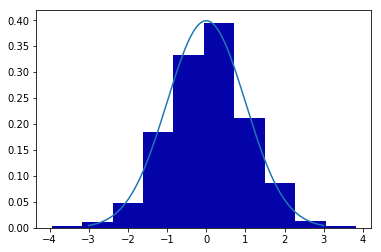

In [2]:
# veja https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

n=1000

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, n)
y = stats.norm.pdf(x, mu, sigma)
mostra = np.random.normal(mu, sigma, n)

plt.figure()
plt.plot(x, y)

n, bins, patches = plt.hist(mostra, density=True, color='#0504aa')

plt.show()


## Observacoes:

- **outliers**: se estamos seguros de que nao tem significado relevante, podemos jogar fora.

- as veces se podem modelar erros sistematicos nas medicoes usando distribuicoes nao normais (eg: asimetria na probabilidade $q>q_e$, etc. )

# Propagaçao:
a quantidades derivadas $f(q)$ (ou $f(q, r,...)$ varias medicoes)

** Idea **: usar a aproximacao linear $ f(q) \simeq f(q_0) + \frac{df}{dq}(q_0) (q-q_0)$ (supondo $f$ suave)

Com isto se estima: 
- valor esperado para $f$: $f_0 = f(q_0)$
- intervalo de confianca: $\Delta f = |\frac{df}{dq}(q_0)| \Delta q$




## Exemplos:
- $f(q) = q^2 \Rightarrow \Delta f = 2|q_0| \Delta q$   

(Obs: $e_f := \Delta f/| f| = 2 e_q$)
- $f(q)=\sqrt{q} \Rightarrow \Delta f = \frac{1}{2 \sqrt{q_0}} \Delta q$

(Obs: $e_f = \frac{1}{2} e_q$ )
- $f(q) = cos(q)$ (q rads) $\Rightarrow \Delta f = |sen(q_0)| \Delta q$

(Obs: $e_f = |tan(q_0)| e_q $)


## varias variaveis (eg: 2 por simplicidade)

aprox. linear $f(q,r) \simeq f(q_0,r_0) + \frac{\partial f}{\partial q}(q_0,r_0) (q-q_0) + \frac{\partial f}{\partial r}(q_0,r_0) (r-r_0)$

Em geral se assume que as medicoes de $q$ e $r$ nao estao co-relacionadas, e isto se traduz na estimativa para a propagacao:
$$ \Delta f = \sqrt{[\frac{\partial f}{\partial q}(q_0,r_0) \Delta q]^2 + [\frac{\partial f}{\partial r}(q_0,r_0) \Delta r]^2 ) }$$



### Exemplos:

- $f(q,r)= a q+ b r \Rightarrow \Delta f = \sqrt{a^2 (\Delta q) ^2+b^2 (\Delta r)^2}$

Obs: **Regra pratica da soma dos erros absolutos** 

como $x^2+y^2 \leq (|x| + |y|)^2$, 
$$\Delta f \leq  |a| \Delta q + |b| \Delta r$$





- (se aplica ao pendulo) $f(q,r) = a q^n r^m \Rightarrow \Delta f = \sqrt{(a n q_0^{n-1} r_0^m \Delta q)^2+(a m q_0^n r_0^{m-1} \Delta r)^2}$

Obs: ** Regra pratica da soma dos erros relativos **

$$ e_f = \Delta f/|f| = \sqrt{n^2 ( e_q)^2 + m^2 (e_r)^2} \leq |n| e_q + |m|e_r $$


### As regras praticas sao muito utils no lab e para fazer estimativas rápidas de ordens de grandeza, determinar efeitos relevantes/irrelevantes, etc. !

** Uso **: Nos projetos para entregar, se envolver medicoes experimentais ou 'computacionais', esperamos que seja incluido um análise elementar da propagacao dos erros e a comparacao com valores tabulados/referencia (eg: aceleracao da gravedade $g$ tabulada) dentro dos intervalos de confianca, etc.

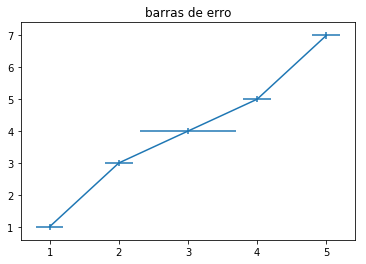

In [3]:
# veja https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

import numpy as np
import matplotlib.pyplot as plt

# dados falsos
x = [1,2,3,4,5]
y = [1,3,4,5,7]

# example variable error bar values
xerr = [0.2, 0.2,0.7,0.2,0.2]
yerr = [0.1, 0.1,0.1,0.1,0.1]


# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr)
plt.title("barras de erro")
plt.show()

## Exercicios:

Para cada comprimento $l$, pegar os archivos do pendulo (luminiscencia e proximidade), extraer de cada um deles uma coleccao de intervalos $(t_1, ... , t_n)$ entre os minimos/pontos de proximidade (lembrar que $t=T/2$, com $T$ o período do pendulo). Pode-se desprezar outliers.

Para cada comprimento:
- plotar esta mostra em um histograma
- achar a media $\bar t$ e a desviacao standard $s_t$
- achar o erro standard $\Delta t$ nesta quantidade 
- assumindo que na medicao do comprimento $l$ teve-se um erro $e_l \simeq 1\%$, estimar o erro na quantidade derivada $$ g \equiv g(t,l) = 4 \pi^2 l/(2t)^2 $$
- verificar se o valor tabulado $g_e = 9.8 m/s^2$ cae dentro da margem de erro para cada $l$

Usando todos os comprimentos:
- fazer uma regressao (quadratica) dos valores $t \ vs \ l$ do tipo $l = a (2t)^2$, estimar o erro inducido nesta quantidade $a\equiv a(t,l)$
- deduzir $g$ usando $a$ e comparar a estimacao do erro com a que vem dos $l$'s individuais, concluir qual metodo é mais preciso.